# Import Packages

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_missing_value, plot_residual
from jcopml.tuning import random_search_params as rsp

In [4]:
pd.set_option('display.max_columns', None)

# Load Dataset

In [3]:
df_train = pd.read_csv("Dataset/train.csv", index_col="Id")
df_test = pd.read_csv("Dataset/test.csv", index_col="Id")

# Plot missing value

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.isna(), cbar=False)
plt.show()

In [ ]:
df_train.info()

# Mini EDA

### FireplaceQu

In [6]:
df_train[["Fireplaces", "FireplaceQu"]][df_train["FireplaceQu"].isna()]
df_train["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

### Alley

In [7]:
df_train[["Street", "Alley"]][df_train["Alley"].isna()]
# df_train["Alley"].value_counts()

,Street,Alley
Id,,
1,Pave,NaN
2,Pave,NaN
3,Pave,NaN
4,Pave,NaN
5,Pave,NaN
...,...,...
1456,Pave,NaN
1457,Pave,NaN
1458,Pave,NaN


### PoolQC

In [8]:
df_train[["PoolArea", "PoolQC"]][df_train["PoolQC"].isna()]
df_train["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

### Fence

In [9]:
df_train["Fence"][df_train["Fence"].isna()]
df_train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

### MiscFeature

In [10]:
df_train["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [11]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Feature selection with correlation matrix

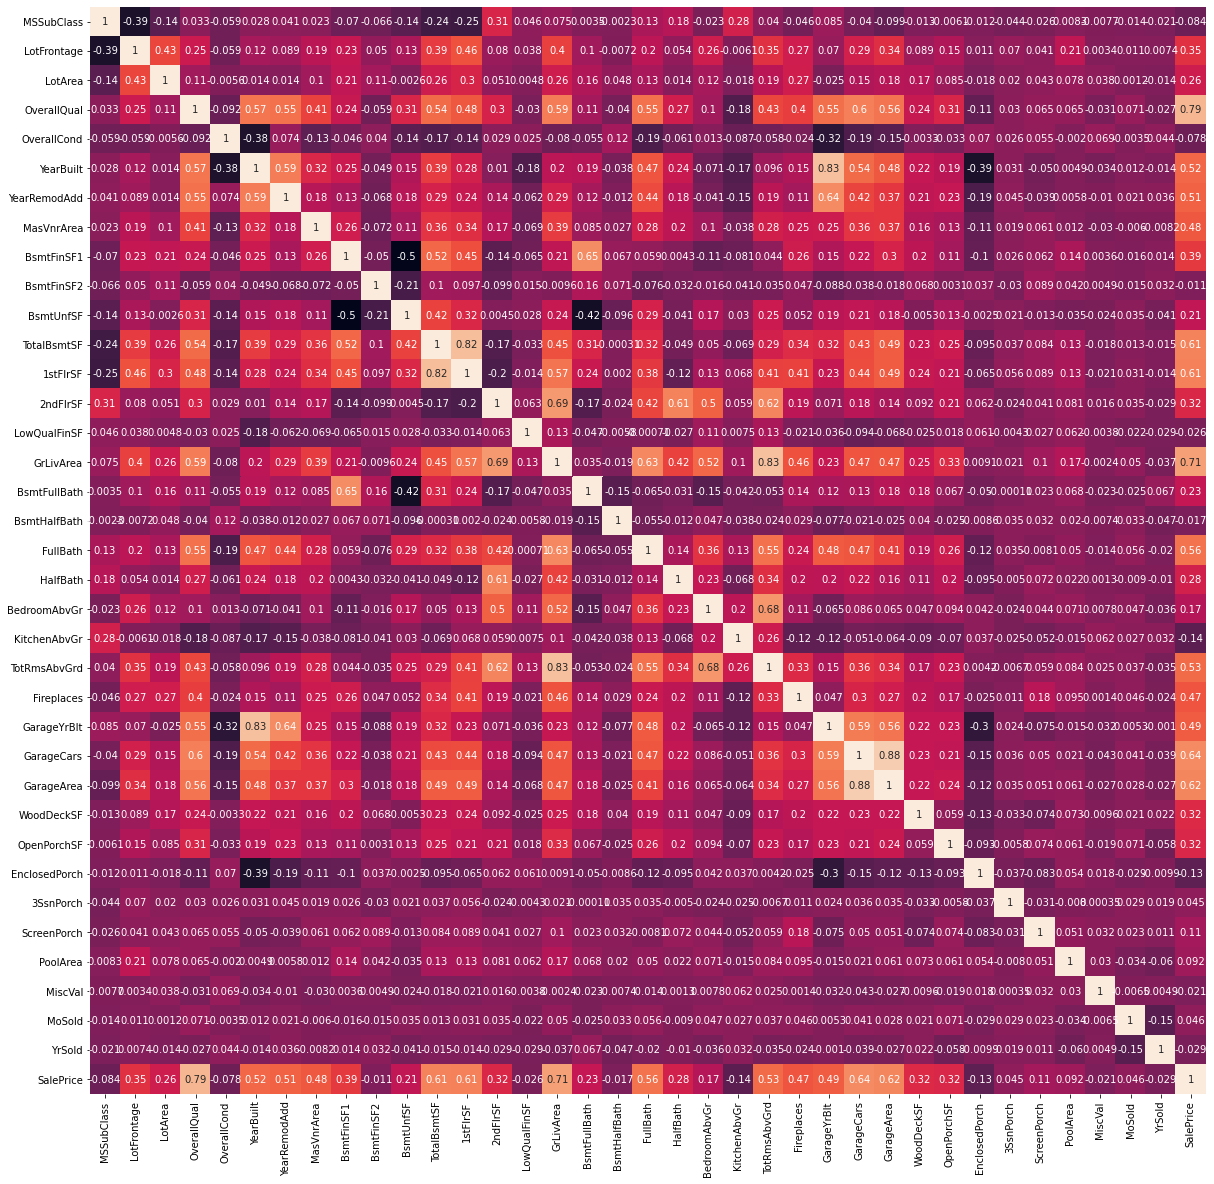

In [15]:
corr = df_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=False, annot=True)
plt.plot();

In [5]:
final_cols = ['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','ExterQual',
                'BsmtQual','TotalBsmtSF','HeatingQC','1stFlrSF','GrLivArea','KitchenQual',
                 'GarageYrBlt','GarageFinish','GarageArea', 'SalePrice']

drop_cols = list(set(df_train.columns) - set(final_cols))
df_train.drop(columns=drop_cols, inplace=True)

In [6]:
df_train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,KitchenQual,GarageYrBlt,GarageFinish,GarageArea,SalePrice
Id,,,,,,,,,,,,,,,
1,7,2003,2003,196.0,Gd,Gd,856,Ex,856,1710,Gd,2003.0,RFn,548,208500
2,6,1976,1976,0.0,TA,Gd,1262,Ex,1262,1262,TA,1976.0,RFn,460,181500
3,7,2001,2002,162.0,Gd,Gd,920,Ex,920,1786,Gd,2001.0,RFn,608,223500
4,7,1915,1970,0.0,TA,TA,756,Gd,961,1717,Gd,1998.0,Unf,642,140000
5,8,2000,2000,350.0,Gd,Gd,1145,Ex,1145,2198,Gd,2000.0,RFn,836,250000


# Splitting DF

In [7]:
X = df_train.drop(columns="SalePrice")
y = df_train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((978, 14), (482, 14), (978,), (482,))

In [8]:
num_cols = ["YearBuilt", "YearRemodAdd", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageYrBlt", "GarageArea"]
cat_cols = list(set(X_train.columns) - set(num_cols))

# Training

### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [18]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="robust", poly=2), num_cols),
    ('categorical', cat_pipe(encoder="onehot"), cat_cols)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

linreg_model = RandomizedSearchCV(pipeline, rsp.linreg_poly_params, n_iter=150, n_jobs=-1, verbose=-1, cv=3)
linreg_model.fit(X_train, y_train)
linreg_model.best_estimator_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   12.6s finished


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      interaction_only=True)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'TotalBsmtSF',
                                                   '1stFlrSF', 'GrLivArea',
                                                   'G

In [24]:
linreg_model.score(X_train, y_train), linreg_model.score(X_test, y_test)

(0.8012009431372156, 0.8301732267870584)

D:\Kurniawan\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Kurniawan\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


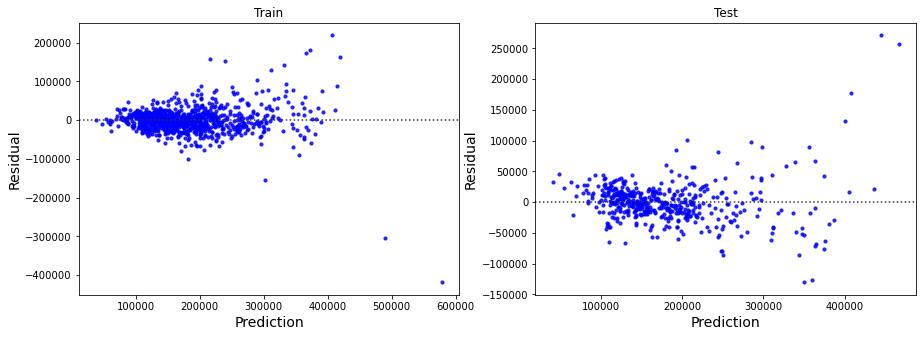

In [35]:
plot_residual(X_train, y_train, X_test, y_test, linreg_model)

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
preprocessor = ColumnTransformer([
    ('num_pipe', num_pipe(scaling="robust"), num_cols),
    ('cat_pipe', cat_pipe(encoder="onehot"), cat_cols)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression())
])

logreg_model = RandomizedSearchCV(pipeline, rsp.logreg_params, n_iter=50, n_jobs=-1, verbose=-1)
logreg_model.fit(X_train, y_train)
logreg_model.best_estimator_

D:\Kurniawan\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'TotalBsmtSF',
                                                   '1stFlrSF', 'GrLivArea',
                                                   'GarageYrBlt',
                                                   'GarageArea']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('imputer',
                                                             

In [25]:
logreg_model.score(X_train, y_train), logreg_model.score(X_test, y_test)

(0.015337423312883436, 0.014522821576763486)

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
preprocessor = ColumnTransformer([
    ('num_pipe', num_pipe(scaling="robust"), num_cols),
    ('cat_pipe', cat_pipe(encoder="onehot"), cat_cols)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor())
])

rf_model = RandomizedSearchCV(pipeline, rsp.rf_params, n_jobs=-1, cv=3, verbose=-1, n_iter=50)
rf_model.fit(X_train, y_train)
rf_model.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   34.6s finished


{'algo__max_depth': 48,
 'algo__max_features': 0.7883345371795484,
 'algo__min_samples_leaf': 5,
 'algo__n_estimators': 190}

In [28]:
rf_model.score(X_train, y_train), rf_model.score(X_test, y_test)

(0.8952446394300344, 0.8193472144985633)

D:\Kurniawan\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Kurniawan\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


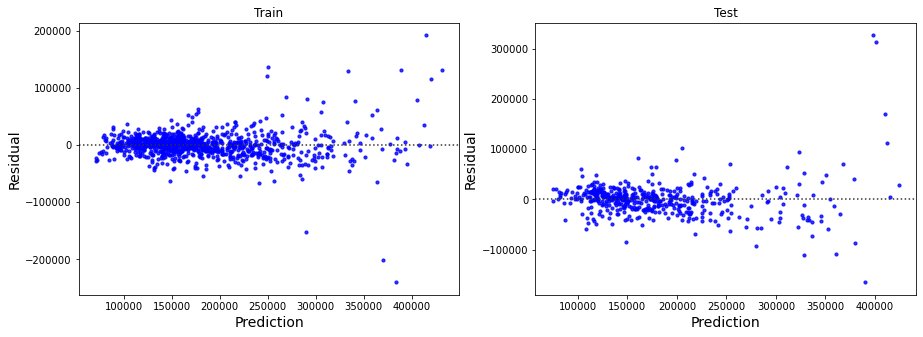

In [36]:
plot_residual(X_train, y_train, X_test, y_test, rf_model)

### XGBoost

In [14]:
from xgboost import XGBRegressor

In [29]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="robust", poly=2), num_cols),
    ('categoric', cat_pipe(encoder="onehot"), cat_cols)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor())
])

xgb_model = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, n_jobs=-1, cv=3, verbose=-1, n_iter=50)
xgb_model.fit(X_train, y_train)
xgb_model.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


{'algo__colsample_bytree': 0.7843972808456879,
 'algo__gamma': 10,
 'algo__learning_rate': 0.11680540150873503,
 'algo__max_depth': 5,
 'algo__n_estimators': 184,
 'algo__reg_alpha': 0.2097292898561305,
 'algo__reg_lambda': 1.053489803643021,
 'algo__subsample': 0.7951408657307734,
 'prep__numeric__poly__degree': 3,
 'prep__numeric__poly__interaction_only': True}

In [30]:
xgb_model.score(X_train, y_train), model.score(X_test, y_test)

(0.9966395166951116, 0.8421314826235886)

D:\Kurniawan\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Kurniawan\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


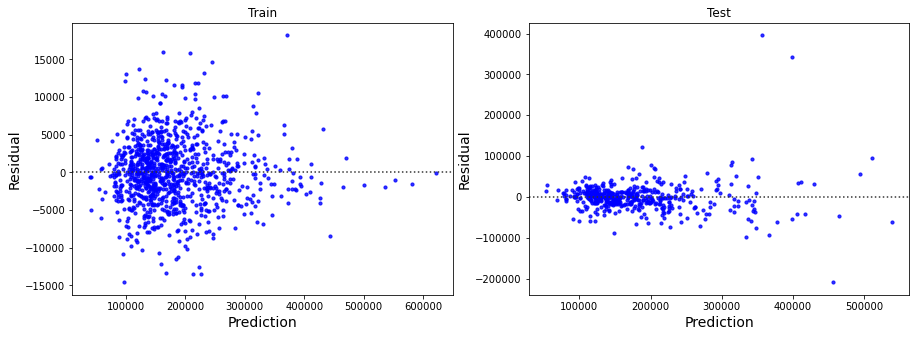

In [38]:
plot_residual(X_train, y_train, X_test, y_test, xgb_model);